In [22]:
import numpy as np
import pandas as pd
from doubleml.datasets import fetch_bonus


In [23]:
# change to microbe / metabolite of interest
treatment = 'rplo 60 (Firmicutes)'
outcome = 'xanthine'

In [24]:
microbes_df = pd.read_csv("../data/microbes.from_biom.tsv", sep='\t', index_col=0).drop(columns="9hr_late")
metabolites_df = pd.read_csv("../data/metabolites.from_biom.tsv", sep='\t', index_col=0)
# Normalize (standard score)
microbes_mean = np.nanmean(microbes_df)             # mean of all microbe abundances
microbes_std = np.nanstd(microbes_df)               # std of all microbe abundances
metabolites_mean = np.nanmean(metabolites_df)       # mean of all metabolite abundances
metabolites_std = np.nanstd(metabolites_df)         # std of all metabolite abundances
microbes_normalized=(microbes_df-microbes_mean)/microbes_std
metabolites_normalized=(metabolites_df-metabolites_mean)/metabolites_std

# use transposed dataframe such that each row is a sample from the dataset
microbes_T = microbes_normalized.T
metabolites_T = metabolites_normalized.T
microbes_T.head()
metabolites_T.head()

#OTU ID,"(2,3-dihydroxy-3-methylbutanoate)","(2,5-diaminohexanoate)",(3-hydroxypyridine),(3-methyladenine),(4-oxoproline),"(5,6-dihydrothymine)",(alanyl-leucine),(dehydroalanine),(glycero-3-phosphoethanolamine),(indoleacrylate),...,thymine,tryptophan,tyrosine,uracil,urate,uridine,urocanate,valine,xanthine,xylitol
3min_early,-0.277345,-0.267520,-0.267584,-0.266215,0.235030,-0.239672,-0.246045,-0.244095,-0.274401,-0.249578,...,-0.276959,-0.231126,-0.276658,-0.262775,-0.277242,-0.265200,-0.276703,-0.276632,-0.276843,-0.277144
9hr_early,-0.277345,-0.273044,-0.257210,-0.148294,0.232900,-0.235547,-0.118421,-0.267765,-0.265341,-0.174992,...,-0.259253,-0.101647,-0.270404,-0.047689,-0.277201,-0.276968,-0.269519,-0.277015,-0.264304,-0.274810
18hr_early,-0.277280,-0.267394,-0.248678,-0.165844,-0.164407,-0.229438,-0.251229,-0.274764,-0.252534,-0.269109,...,-0.260105,-0.263643,-0.277270,0.029030,-0.277124,-0.276796,-0.254871,-0.277049,-0.230279,-0.272884
42hr_early,-0.277312,-0.266448,-0.258986,-0.242298,-0.251582,-0.245461,-0.256226,-0.276263,-0.273805,-0.276877,...,-0.263256,-0.276283,-0.277218,-0.097477,-0.276822,-0.276979,-0.269276,-0.277133,-0.213584,-0.274739
49p5hr_early,-0.277143,-0.256714,-0.215270,-0.262638,-0.261438,-0.261463,-0.256369,-0.275941,-0.264756,-0.276348,...,-0.276522,-0.275317,-0.277248,-0.273705,-0.277022,-0.276807,-0.266561,-0.277137,-0.265447,-0.276703


<Axes: >

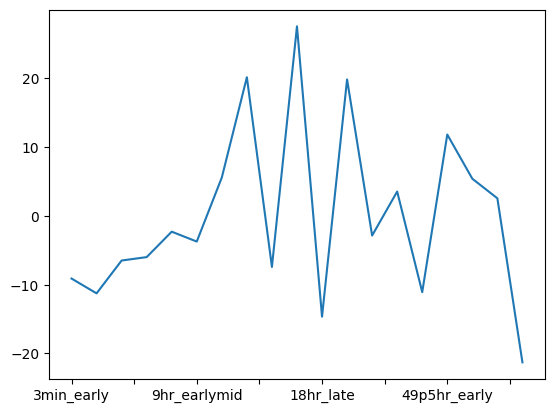

In [25]:
metabolites_T['sum'] = metabolites_T.sum(axis=1, numeric_only=True)
microbes_T['sum'] = microbes_T.sum(axis=1, numeric_only=True)
microbes_T['sum'].plot()

In [26]:
from doubleml import DoubleMLData

# add metabolite of interest to the dataframe 
joined_data = pd.concat([metabolites_T[outcome], microbes_T], axis=1)
joined_data.head(20)

,xanthine,rplo 1 (Cyanobacteria),rplo 2 (Firmicutes),rplo 60 (Firmicutes),rplo 7 (Actinobacteria),rplo 10 (Firmicutes),rplo 100 (Proteobacteria),rplo 101 (Proteobacteria),rplo 102 (Actinobacteria),rplo 103 (Actinobacteria),...,rplo 91 (Actinobacteria),rplo 92 (Proteobacteria),rplo 93 (Proteobacteria),rplo 94 (unknown),rplo 95 (Proteobacteria),rplo 96 (unknown),rplo 97 (Firmicutes),rplo 98 (Actinobacteria),rplo 99 (Cyanobacteria),sum
3min_early,-0.276843,19.229766,-0.226543,-0.226543,0.698824,-0.226543,0.396664,-0.226543,0.151158,-0.226543,...,-0.122675,0.141716,-0.037692,0.052012,0.306960,0.061454,-0.226543,-0.226543,-0.226543,-9.122963
9hr_early,-0.264304,9.579512,17.865322,-0.226543,2.077432,-0.226543,-0.070741,-0.226543,0.155879,0.103946,...,-0.014086,0.245583,-0.132117,0.439155,-0.117954,-0.032971,-0.226543,-0.089626,-0.226543,-2.310187
18hr_early,-0.230279,17.577325,12.010961,-0.226543,1.931073,3.432433,0.033127,0.122831,0.387221,1.034034,...,0.118109,-0.023528,-0.023528,-0.028250,0.004799,1.034034,-0.226543,0.576071,-0.226543,20.144121
42hr_early,-0.213584,9.768363,8.182020,-0.226543,2.171857,3.172764,-0.089626,-0.127396,0.037848,0.906560,...,0.160601,-0.051856,-0.226543,0.122831,-0.032971,-0.047135,1.482553,0.382500,-0.226543,19.823076
49p5hr_early,-0.265447,1.194556,0.694103,0.004799,1.487274,1.383407,-0.056577,4.102852,-0.226543,-0.136839,...,0.118109,-0.122675,-0.226543,0.391942,2.946143,-0.226543,1.827205,0.014242,-0.113232,11.811099
3min_earlymid,-0.275740,20.967189,-0.108511,-0.226543,0.349451,-0.226543,0.037848,-0.226543,-0.127396,-0.132117,...,0.363615,-0.014086,0.406106,-0.014086,-0.108511,0.099224,-0.226543,-0.226543,-0.108511,-11.275857
9hr_earlymid,-0.182553,7.096130,16.406453,-0.226543,1.402292,-0.226543,-0.018807,-0.132117,0.023684,-0.094347,...,0.226698,0.018963,-0.146281,0.103946,-0.132117,0.108667,-0.226543,-0.108511,-0.047135,-3.745449
18hr_earlymid,-0.195486,4.570257,-0.136839,0.864068,1.119016,-0.226543,-0.226543,-0.226543,0.424991,0.703545,...,-0.136839,-0.061299,-0.146281,-0.061299,-0.132117,0.023684,-0.226543,0.731873,-0.226543,-7.437474
42hr_earlymid,-0.147530,6.463481,11.269723,-0.004643,1.237048,-0.226543,-0.061299,-0.151002,0.377779,0.292796,...,-0.151002,0.037848,-0.160445,0.037848,-0.075462,0.793249,-0.226543,0.812134,-0.226543,-2.872016
49p5hr_earlymid,-0.121175,2.969750,1.199278,2.459854,1.322030,10.580419,-0.014086,0.207813,-0.099069,0.108667,...,-0.226543,0.028405,-0.099069,-0.226543,-0.226543,-0.094347,0.396664,-0.127396,-0.226543,5.390187


In [27]:
# get column names of covariates
cols = microbes_T.columns
cols = cols.drop(treatment)

# make DML Data frame
dml_data = DoubleMLData(joined_data,
                              y_col=outcome,
                              d_cols=treatment,
                              x_cols=list(cols))
print(dml_data)

================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: xanthine
Treatment variable(s): ['rplo 60 (Firmicutes)']
Covariates: ['rplo 1 (Cyanobacteria)', 'rplo 2 (Firmicutes)', 'rplo 7 (Actinobacteria)', 'rplo 10 (Firmicutes)', 'rplo 100 (Proteobacteria)', 'rplo 101 (Proteobacteria)', 'rplo 102 (Actinobacteria)', 'rplo 103 (Actinobacteria)', 'rplo 104 (Bacteroidetes)', 'rplo 105 (Proteobacteria)', 'rplo 106 (Acidobacteria)', 'rplo 107 (Actinobacteria)', 'rplo 108 (Actinobacteria)', 'rplo 109 (Proteobacteria)', 'rplo 11 (Proteobacteria)', 'rplo 110 (Proteobacteria)', 'rplo 111 (Actinobacteria)', 'rplo 112 (Actinobacteria)', 'rplo 113 (unknown)', 'rplo 114 (Deinococcus-Thermus)', 'rplo 115 (Acidobacteria)', 'rplo 116 (unknown)', 'rplo 117 (Deferribacteres)', 'rplo 118 (Acidobacteria)', 'rplo 119 (Actinobacteria)', 'rplo 12 (Gemmatimonadetes)', 'rplo 120 (Actinobacteria)', 'rplo 121 (Actinobacteria)', 'rplo 122 (Cy

In [28]:
from sklearn.base import clone
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV

learner = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth= 4)
ml_l_bonus = clone(learner)
ml_m_bonus = clone(learner)

In [29]:
from doubleml import DoubleMLPLR

np.random.seed(3141)
obj_dml_plr = DoubleMLPLR(dml_data, ml_l_bonus, ml_m_bonus)
obj_dml_plr.fit();
print(obj_dml_plr)

================== DoubleMLPLR Object ==================

------------------ Data summary      ------------------
Outcome variable: xanthine
Treatment variable(s): ['rplo 60 (Firmicutes)']
Covariates: ['rplo 1 (Cyanobacteria)', 'rplo 2 (Firmicutes)', 'rplo 7 (Actinobacteria)', 'rplo 10 (Firmicutes)', 'rplo 100 (Proteobacteria)', 'rplo 101 (Proteobacteria)', 'rplo 102 (Actinobacteria)', 'rplo 103 (Actinobacteria)', 'rplo 104 (Bacteroidetes)', 'rplo 105 (Proteobacteria)', 'rplo 106 (Acidobacteria)', 'rplo 107 (Actinobacteria)', 'rplo 108 (Actinobacteria)', 'rplo 109 (Proteobacteria)', 'rplo 11 (Proteobacteria)', 'rplo 110 (Proteobacteria)', 'rplo 111 (Actinobacteria)', 'rplo 112 (Actinobacteria)', 'rplo 113 (unknown)', 'rplo 114 (Deinococcus-Thermus)', 'rplo 115 (Acidobacteria)', 'rplo 116 (unknown)', 'rplo 117 (Deferribacteres)', 'rplo 118 (Acidobacteria)', 'rplo 119 (Actinobacteria)', 'rplo 12 (Gemmatimonadetes)', 'rplo 120 (Actinobacteria)', 'rplo 121 (Actinobacteria)', 'rplo 122 (Cya

In [30]:
obj_dml_plr.coef[0]

np.float64(0.05125194085747093)